In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

[&larr; Back to Index](index.html)

# Zero Crossing Rate

The [zero crossing rate](https://en.wikipedia.org/wiki/Zero-crossing_rate) indicates the number of times that a signal crosses the horizontal axis.

Let's load a signal:

In [2]:
x, sr = librosa.load('audio/simple_loop.wav')

Listen to the signal:

In [3]:
ipd.Audio(x, rate=sr)

Plot the signal:

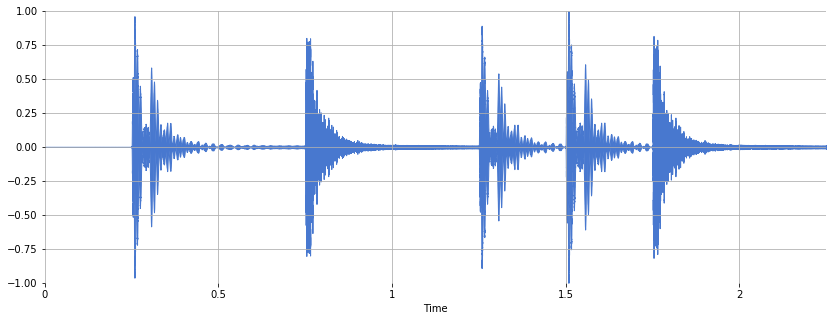

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

Let's zoom in:

In [5]:
len(x)

49613

In [10]:
n0 = 6500
n1 = 7500

print(n0/sr, n1/sr)

0.2947845804988662 0.3401360544217687


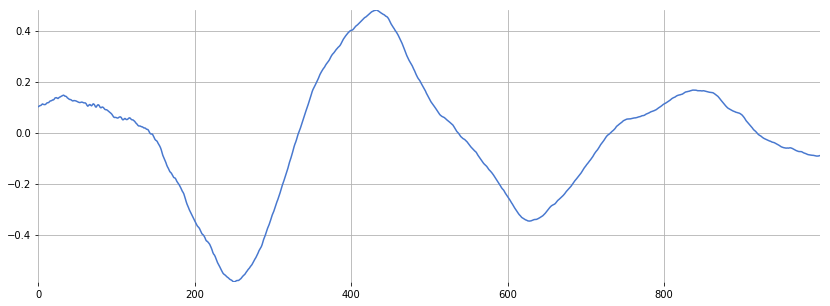

In [9]:

plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])

I count five zero crossings. Let's compute the zero crossings using librosa.

In [11]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

In [12]:
zero_crossings.shape

(1000,)

That computed a binary mask where `True` indicates the presence of a zero crossing. To find the total number of zero crossings, use `sum`:

In [13]:
print(sum(zero_crossings))

5


To find the *zero-crossing rate* over time, use `zero_crossing_rate`:

In [14]:
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)

(1, 97)


Plot the zero-crossing rate:

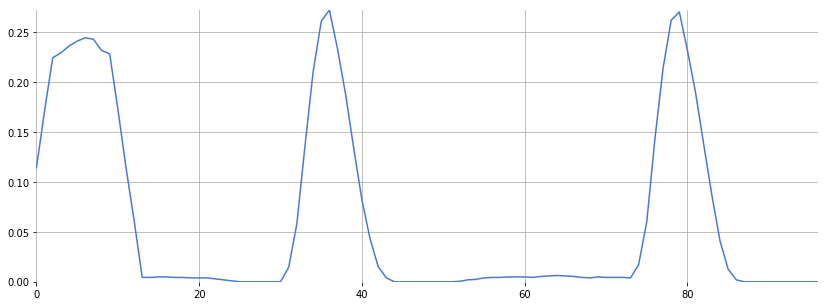

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

Note how the high zero-crossing rate corresponds to the presence of the snare drum.

The reason for the high rate near the beginning is because the silence oscillates quietly around zero:

(-0.0001, 0.0001)

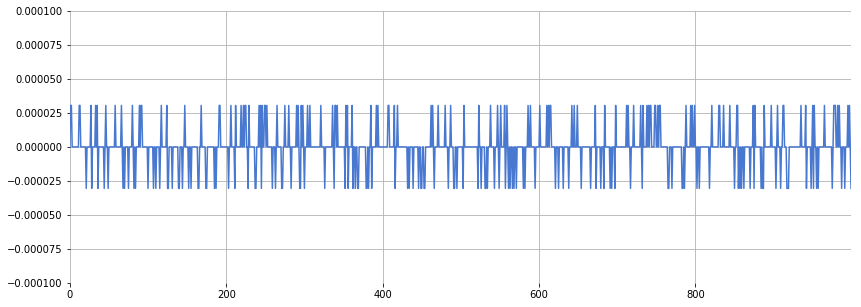

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(x[:1000])
plt.ylim(-0.0001, 0.0001)

A simple hack around this is to add a small constant before computing the zero crossing rate:

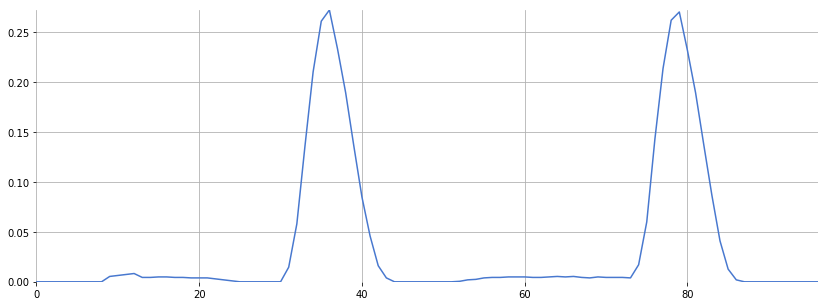

In [17]:
zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

## Questions

Try for other audio files. Does the zero-crossing rate still return something useful in polyphonic mixtures?

In [18]:
ls audio

125_bounce.wav                  c_strum.wav       simple_piano.wav
58bpm.wav                       drum_samples/     sir_duke_piano_fast.mp3
brahms_hungarian_dance_5.mp3    funk_groove.mp3   sir_duke_piano_slow.mp3
busta_rhymes_hits_for_days.mp3  jangle_pop.mp3    sir_duke_trumpet_fast.mp3
clarinet_c6.wav                 latin_groove.mp3  sir_duke_trumpet_slow.mp3
classic_rock_beat.mp3           oboe_c6.wav       thx_original.mp3
classic_rock_beat.wav           prelude_cmaj.wav  tone_440.wav
conga_groove.wav                README.md
cowbell.wav                     simple_loop.wav


[&larr; Back to Index](index.html)

In [24]:
ipd.Audio('audio/jangle_pop.mp3')

In [25]:
x, sr = librosa.load('audio/jangle_pop.mp3')

/home/cjbayron/virtualenvs/pytorch/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [28]:
len(x)

354816

In [38]:
zcrs = librosa.feature.zero_crossing_rate(x + 0.001)

In [41]:
zcrs[0][:10]

array([0.        , 0.        , 0.01757812, 0.03076172, 0.04248047,
       0.05078125, 0.04052734, 0.03369141, 0.02929688, 0.02978516])

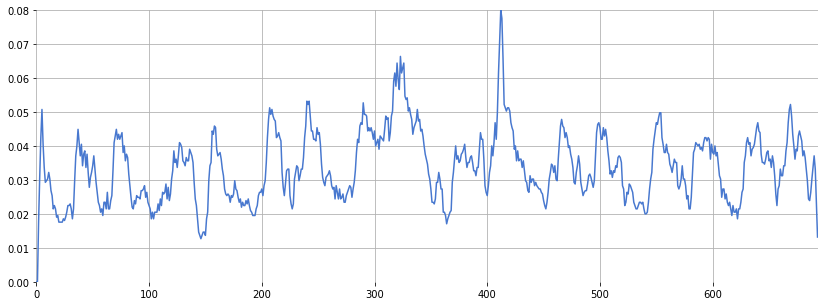

In [39]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])